# Student Marks Predicton Model using Machine Learing 

# Importing Necessary Libraries 

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the Dataset

In [181]:
df= pd.read_csv("Students_Marks_Dataset.csv")

# Observing Features and Insatances of Dataset

In [182]:
print("First 5 insatnces of dataset\n")
print(df.head())

First 5 insatnces of dataset

   Study_Hours  Attendance  Assignments  Sleep_Hours  Past_Performance  \
0          3.6        88.0         88.0          6.7              62.0   
1          2.8        84.0         71.0          4.6              65.0   
2          3.8        83.0         80.0          NaN              64.0   
3          4.8        76.0        100.0          6.3              72.0   
4          2.7        79.0          NaN          6.0              60.0   

   Final_Marks  
0         85.0  
1         72.0  
2        100.0  
3          NaN  
4         83.0  


In [183]:
print("Last 5 instances of dataset\n")
print(df.tail())

Last 5 instances of dataset

     Study_Hours  Attendance  Assignments  Sleep_Hours  Past_Performance  \
515          4.1        81.0         73.0          7.3              69.0   
516          2.0        75.0         87.0          5.2              52.0   
517          3.1        80.0         81.0          6.6              67.0   
518          2.2       100.0         74.0          7.7              99.0   
519          1.3        90.0         66.0          6.3              59.0   

     Final_Marks  
515        150.0  
516         65.0  
517         95.0  
518        100.0  
519         83.0  


# Exploring the Dataset

In [184]:
print("Dataset Information\n")
print(df.info())

Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Study_Hours       515 non-null    float64
 1   Attendance        515 non-null    float64
 2   Assignments       515 non-null    float64
 3   Sleep_Hours       515 non-null    float64
 4   Past_Performance  515 non-null    float64
 5   Final_Marks       515 non-null    float64
dtypes: float64(6)
memory usage: 24.5 KB
None


In [185]:
print("Statistical Summary\n")
print(df.describe(include= 'all'))

Statistical Summary

       Study_Hours  Attendance  Assignments  Sleep_Hours  Past_Performance  \
count   515.000000  515.000000   515.000000   515.000000        515.000000   
mean      3.084078   85.370874    80.679612     6.514757         70.091262   
std       1.626848   11.600866    13.696696     1.094688         11.503401   
min       0.000000  -10.000000    37.000000     3.200000         39.000000   
25%       2.200000   79.000000    71.000000     5.800000         62.000000   
50%       3.000000   86.000000    81.000000     6.500000         70.000000   
75%       3.800000   92.000000    91.000000     7.200000         78.000000   
max      20.000000  200.000000   100.000000    10.000000        100.000000   

       Final_Marks  
count   515.000000  
mean     88.899029  
std      10.134960  
min      -5.000000  
25%      83.000000  
50%      89.000000  
75%      97.000000  
max     150.000000  


In [186]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (520, 6)


In [187]:
print("Missing Values per column\n")
print(df.isnull().sum())

Missing Values per column

Study_Hours         5
Attendance          5
Assignments         5
Sleep_Hours         5
Past_Performance    5
Final_Marks         5
dtype: int64


In [188]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        median_val=df[col].median()
        df[col]=df[col].fillna(median_val)
        print(f"Filled missing values in {col} with median: {median_val}")

Filled missing values in Study_Hours with median: 3.0
Filled missing values in Attendance with median: 86.0
Filled missing values in Assignments with median: 81.0
Filled missing values in Sleep_Hours with median: 6.5
Filled missing values in Past_Performance with median: 70.0
Filled missing values in Final_Marks with median: 89.0


In [189]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 7


In [190]:
df.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (513, 6)


In [191]:
print("No. of null values in Features after filling\n")
print(df.isnull().sum())

No. of null values in Features after filling

Study_Hours         0
Attendance          0
Assignments         0
Sleep_Hours         0
Past_Performance    0
Final_Marks         0
dtype: int64


In [192]:
df= df.astype(float) # Fixing Data Types

In [193]:
def handle_outliers(df, columns):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1- 1.5* IQR
    upper_bound= Q1+ 1.5* IQR

    df[column]= np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column]= np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

    for col in df.columns:
            df= handle_outliers(df, col)
     
         # Removing rows with impossible values 
df= df[(df["Final_Marks"]>=0) & (df["Final_Marks"]<=100)]
df= df[(df["Attendance"]>=0) & (df["Attendance"]<=100)]
df= df[(df["Past_Performance"]>=0) & (df["Past_Performance"]<=100)]
df= df[(df["Assignments"]>=0) & (df["Assignments"]<=100)]
df= df[(df["Study_Hours"]>=0) & (df["Study_Hours"]<=10)]
df= df[(df["Sleep_Hours"]>=0) & (df["Sleep_Hours"]<=10)]    # Removing rows with impossible values 

print(f"Shape after handling outliers: {df.shape}")

Shape after handling outliers: (504, 6)


# Cleaned Dataset Infromation

In [194]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 516
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Study_Hours       504 non-null    float64
 1   Attendance        504 non-null    float64
 2   Assignments       504 non-null    float64
 3   Sleep_Hours       504 non-null    float64
 4   Past_Performance  504 non-null    float64
 5   Final_Marks       504 non-null    float64
dtypes: float64(6)
memory usage: 27.6 KB
None


In [195]:
print(df.describe(include="all"))

       Study_Hours  Attendance  Assignments  Sleep_Hours  Past_Performance  \
count   504.000000  504.000000   504.000000   504.000000        504.000000   
mean      2.996627   85.148810    80.551587     6.508135         70.093254   
std       1.176378    9.131885    13.708602     1.095315         11.383310   
min       0.000000   58.000000    37.000000     3.200000         39.000000   
25%       2.100000   79.000000    71.000000     5.800000         62.000000   
50%       3.000000   86.000000    81.000000     6.500000         70.000000   
75%       3.800000   92.000000    91.000000     7.200000         78.000000   
max       7.600000  100.000000   100.000000    10.000000        100.000000   

       Final_Marks  
count   504.000000  
mean     88.869048  
std       8.747775  
min      57.000000  
25%      83.000000  
50%      89.000000  
75%      96.000000  
max     100.000000  


# Exploratory Data Analysis (EDA)

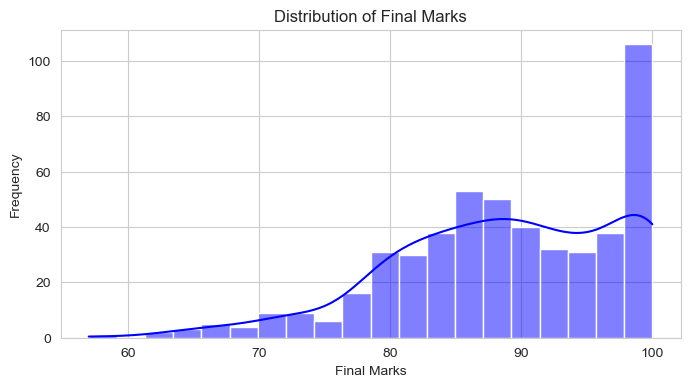

In [196]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
sns.histplot(df["Final_Marks"], kde=True, bins=20, color= "blue")
plt.title("Distribution of Final Marks")
plt.xlabel("Final Marks")
plt.ylabel("Frequency")
plt.show()

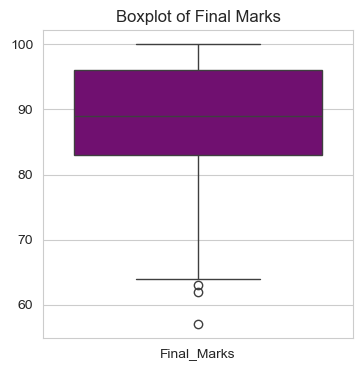

In [197]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df[["Final_Marks"]], color="purple")
plt.title("Boxplot of Final Marks")
plt.show()

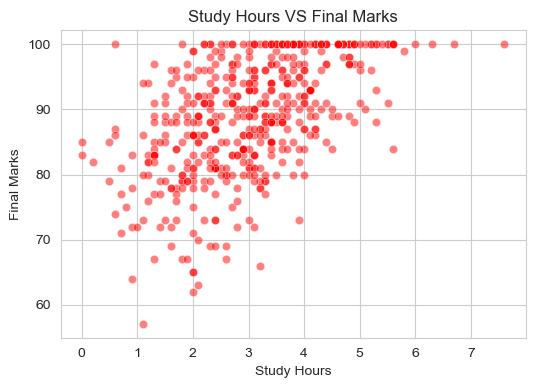

In [198]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Study_Hours", y="Final_Marks", alpha=0.5,  color="red")
plt.title("Study Hours VS Final Marks")
plt.xlabel("Study Hours")
plt.ylabel("Final Marks")
plt.show()


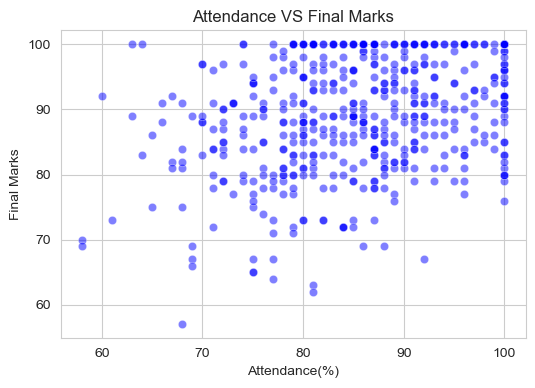

In [199]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Attendance", y="Final_Marks", alpha=0.5,  color="blue")
plt.title("Attendance VS Final Marks")
plt.xlabel("Attendance(%)")
plt.ylabel("Final Marks")
plt.show()


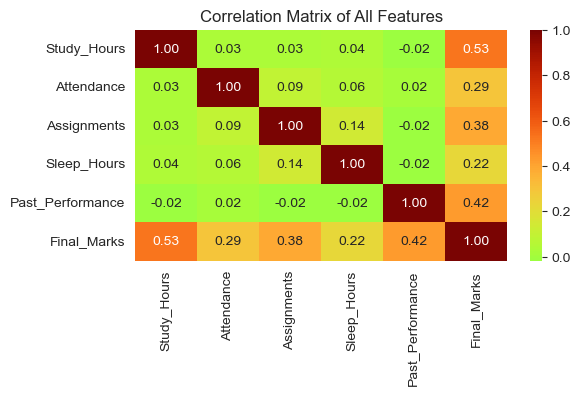

In [200]:
plt.figure(figsize=(6,3))
correlation_matrix= df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="turbo", center=0, fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

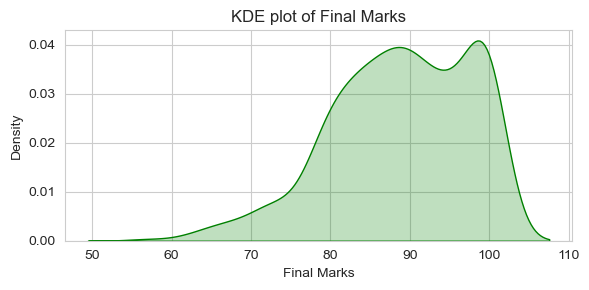

In [201]:
plt.figure(figsize=(6,3))
sns.kdeplot(df["Final_Marks"], fill=True, color="green")
plt.xlabel("Final Marks")
plt.title("KDE plot of Final Marks")
plt.tight_layout()
plt.show()

# Feature Engineering 

In [202]:
print("Correlation with Final_Marks\n")
print(df.corr()["Final_Marks"].sort_values(ascending=False))

Correlation with Final_Marks

Final_Marks         1.000000
Study_Hours         0.529514
Past_Performance    0.423178
Assignments         0.384061
Attendance          0.292170
Sleep_Hours         0.222996
Name: Final_Marks, dtype: float64


In [203]:
print("Checking for multiple Correlations\n")
high_corr_pairs= []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) >0.8:
            high_corr_pairs.append(correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j])

if high_corr_pairs:
    print("High correlation pairs found ", high_corr_pairs)
else:
    print("No correlation found, We keep all features")


Checking for multiple Correlations

No correlation found, We keep all features


In [204]:
# Features and Targets
X= df.drop("Final_Marks", axis=1)
y= df["Final_Marks"]

print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")


Features Shape: (504, 5)
Target Shape: (504,)


# Model Building 

In [205]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training dataset size (X_train): {X_train.shape}")
print(f"Testing dataset size: (X_test) {X_test.shape}")


Training dataset size (X_train): (403, 5)
Testing dataset size: (X_test) (101, 5)


In [206]:
model= LinearRegression()
model.fit(X_train, y_train)
         # Predictions
          
y_pred= model.predict(X_test)

print("Model Trained Successfully....")

Model Trained Successfully....


# Model Evolution

In [207]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test, y_pred)

print("="*50)
print("MODEL EVOLUTION METRICS (Linear Regression)")
print("="*50)
#print("\n")
print(f"R_Saquared (R²): {r2: .4f}")
print(f"Mean Absolute Error (MAE): {mae: .4f}")
print(f"Mean Squared Error (MSE): {mse: .4f}")
print(f"Root Mean Squared Error (RMSE): {rmse: .4f}")
print("="*50)

MODEL EVOLUTION METRICS (Linear Regression)
R_Saquared (R²):  0.5931
Mean Absolute Error (MAE):  4.0623
Mean Squared Error (MSE):  25.1565
Root Mean Squared Error (RMSE):  5.0156


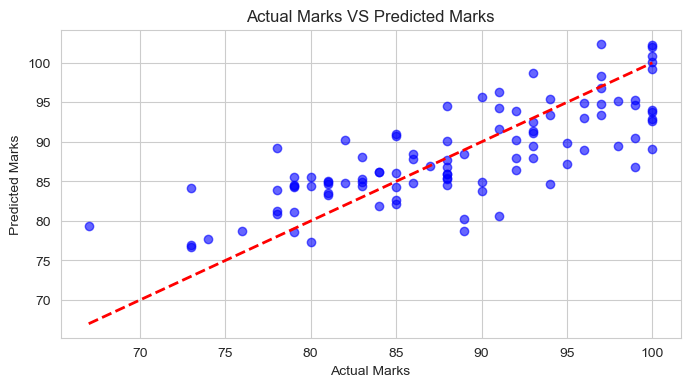

In [208]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual Marks VS Predicted Marks")
plt.grid(True)
plt.show()

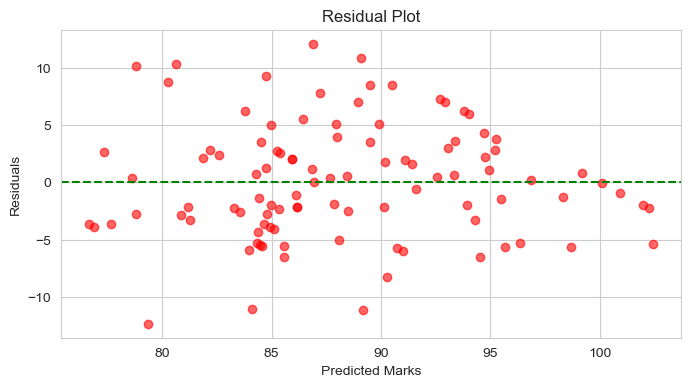

In [209]:
residuals= y_test- y_pred
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals, alpha=0.6, color="red")
plt.axhline(y=0, color="g", linestyle="--")
plt.xlabel("Predicted Marks")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# Factor Impact Analysis

In [210]:
coefficients= pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_,
    "Absolute_Coefficient": abs(model.coef_)
})
coefficients= coefficients.sort_values("Absolute_Coefficient", ascending=False)
print("="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)
print(coefficients)
print("\n" + "="*50)


FEATURE IMPORTANCE ANALYSIS
            Feature  Coefficient  Absolute_Coefficient
0       Study_Hours     3.704675              3.704675
3       Sleep_Hours     1.322739              1.322739
4  Past_Performance     0.346391              0.346391
1        Attendance     0.229010              0.229010
2       Assignments     0.207493              0.207493



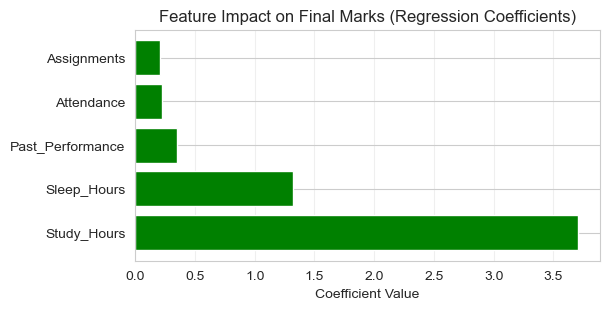

In [211]:
plt.figure(figsize=(6,3))
colors= ["green" if c>0 else "red" for c in coefficients["Coefficient"]]
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color=colors)
plt.xlabel("Coefficient Value")
plt.title("Feature Impact on Final Marks (Regression Coefficients)")
plt.axvline(x=0, color="black", linestyle="-", linewidth=0.5)
plt.grid(axis="x", alpha=0.3)
plt.show()

In [212]:
correlation_with_target= df.corr()["Final_Marks"].drop("Final_Marks").sort_values(ascending=False)
print("Correlation with Final Marks\n")
print(correlation_with_target)

Correlation with Final Marks

Study_Hours         0.529514
Past_Performance    0.423178
Assignments         0.384061
Attendance          0.292170
Sleep_Hours         0.222996
Name: Final_Marks, dtype: float64


# Testing Model on Sample Data 

In [213]:
def predict_constrained(model, X_input):
    predictions = model.predict(X_input)
    predictions = np.where(predictions < 0, 0, predictions)
    predictions = np.where(predictions > 100, 100, predictions)
    return predictions

print("="*50)
print("TESTING THE MODEL WITH SAMPLE STUDENT DATA")
print("="*50)

student = np.array([[3.8, 83.0, 80.0, 6.5, 70.0]])
predicted_constrained = predict_constrained(model, student)
print(f"\nPredicted Final Marks: {predicted_constrained[0]:.1f}\n")

TESTING THE MODEL WITH SAMPLE STUDENT DATA

Predicted Final Marks: 91.2



D:\Anaconda Setup\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [215]:
print(f"Mean of Final Marks: {df["Final_Marks"].mean()}")

Mean of Final Marks: 88.86904761904762


In [219]:
print(f"Median of Final Marks: {df["Final_Marks"].median()}")

Median of Final Marks: 89.0
